## Introduction

Autoencoders are a type of artificial neural network designed for **unsupervised learning**, primarily used for **dimensionality reduction, feature extraction, and data reconstruction**. They consist of two main components: an **encoder**, which compresses the input data into a smaller latent representation, and a **decoder**, which reconstructs the original data from this compressed form.

In this assignment, we implement a **basic autoencoder using the MNIST dataset** of handwritten digits. The goal is to train the model to learn **efficient representations of 28×28 grayscale images** and reconstruct them as accurately as possible. By analyzing the reconstruction performance and training loss curves, we can evaluate the model’s ability to capture essential features while reducing dimensionality.


In [1]:
# 1. Import libraries and load datasets

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten 28x28 images to 784-dimensional vectors
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 2. Build Autoencoder

In [2]:
# Dimensions
input_dim = 28*28
latent_dim = 64  # smaller latent representation

# Encoder
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(latent_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder Model
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Display model summary
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

# 3. Train Autoencoder

In [3]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.3241 - val_loss: 0.1386
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1313 - val_loss: 0.1105
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1089 - val_loss: 0.0999
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1000 - val_loss: 0.0943
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0946 - val_loss: 0.0905
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0909 - val_loss: 0.0876
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0881 - val_loss: 0.0857
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0866 - val_loss: 0.0843
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0849 - val_loss: 0.0831
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0837 - val_loss: 0.0820
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0827 - val_loss: 0.0812
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

# 4. Plot Training and Validation Loss

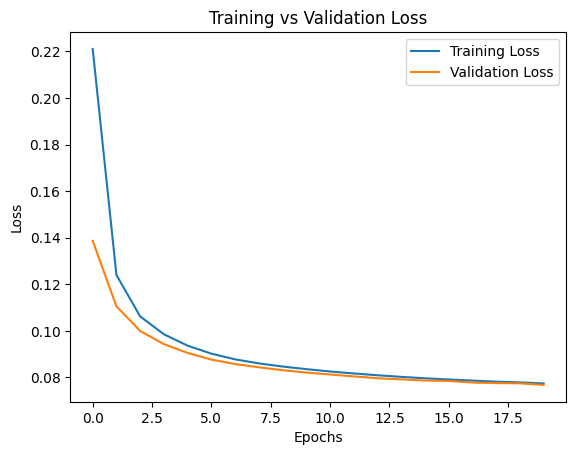

In [4]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#5. Reconstruct and Compare Images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


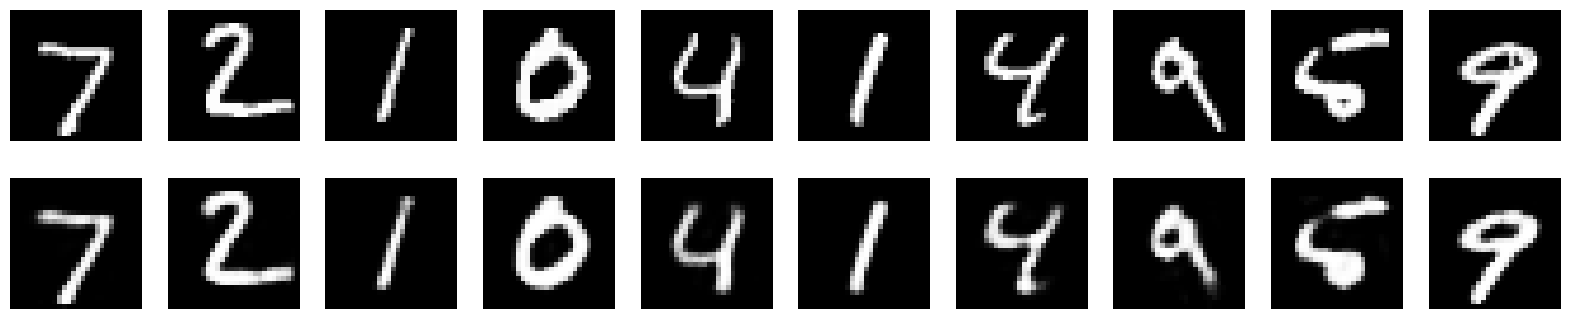

In [5]:
# Reconstruct test images
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.show()


## Conclusion

The autoencoder successfully learned a compressed representation of the MNIST digits. The training and validation loss decreased steadily, indicating effective learning without overfitting. The reconstructed images closely resemble the original digits, though some minor details are slightly blurred due to compression. This demonstrates the model’s ability to capture essential features of the input while reducing dimensionality.